In [1]:
import alpaca_trade_api as tradeapi
from dotenv import load_dotenv
import pandas as pd
from datetime import date
from CanaryFinancialCalculations import CanaryFinancialCalculations 

In [2]:
alpaca_api_key = 'PK306FA7SFOSMY9LBUZ4'
alpaca_secret_key = 'oNujbWMi3ZLrZuVggRN1DnZBLs38EJO00cwyOgsE'
base_url = 'https://paper-api.alpaca.markets'

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    base_url,
    api_version="v2")

tickers = ["AAPL", "TSLA", "GOOGL", "AMD", "AMC"]
benchmark= ["SPY"]
timeframe = '1Day'
initial_investment = 10000
weights = [(1 / len(tickers))] * len(tickers)

start_date = pd.Timestamp("2018-10-23", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-10-23", tz="America/New_York").isoformat()

portfolio_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df


In [3]:
benchmark_df = alpaca.get_bars(
    benchmark,
    timeframe,
    start=start_date,
    end=end_date
).df


In [4]:
benchmark_df = benchmark_df.pivot(columns='symbol', values='close')
benchmark_df = benchmark_df.pct_change()
benchmark_df.index = benchmark_df.index.date
benchmark_df = benchmark_df.dropna()
benchmark_df.index.name='Date'
benchmark_df

symbol,SPY
Date,
2018-10-24,-0.030382
2018-10-25,0.018099
2018-10-26,-0.017740
2018-10-29,-0.005769
2018-10-30,0.015890
...,...
2023-10-17,-0.000046
2023-10-18,-0.013325
2023-10-19,-0.008786


In [5]:

portfolio_df = portfolio_df.pivot(columns='symbol', values='close')
portfolio_df = portfolio_df.pct_change()
portfolio_df.index = portfolio_df.index.date
portfolio_df = portfolio_df.dropna()
portfolio_df.index.name='Date'
portfolio_df

symbol,AAPL,AMC,AMD,GOOGL,TSLA
Date,,,,,
2018-10-24,-0.034302,-0.094924,-0.091670,-0.051834,-0.019175
2018-10-25,0.021898,0.049355,-0.154454,0.043959,0.091369
2018-10-26,-0.015924,-0.047034,-0.085106,-0.017978,0.050943
2018-10-29,-0.018770,0.049916,-0.044243,-0.045232,0.011937
2018-10-30,0.004994,0.027778,0.020772,0.014284,-0.014783
...,...,...,...,...,...
2023-10-17,-0.008785,0.056806,-0.012399,0.004493,0.003663
2023-10-18,-0.007395,-0.070994,-0.028248,-0.012597,-0.047754
2023-10-19,-0.002161,0.021834,0.002251,-0.001522,-0.093003


In [6]:
user_returns = portfolio_df.dot(weights)
user_returns_df = pd.DataFrame(user_returns)
user_returns_df.columns = ['Portfolio']
user_returns_df

,Portfolio
Date,
2018-10-24,-0.058381
2018-10-25,0.010425
2018-10-26,-0.023020
2018-10-29,-0.009278
2018-10-30,0.010609
...,...
2023-10-17,0.008756
2023-10-18,-0.033397
2023-10-19,-0.014520


In [7]:
comparing_portfolios = pd.concat([user_returns_df, benchmark_df], axis=1, join='inner')
comparing_portfolios

,Portfolio,SPY
Date,,
2018-10-24,-0.058381,-0.030382
2018-10-25,0.010425,0.018099
2018-10-26,-0.023020,-0.017740
2018-10-29,-0.009278,-0.005769
2018-10-30,0.010609,0.015890
...,...,...
2023-10-17,0.008756,-0.000046
2023-10-18,-0.033397,-0.013325
2023-10-19,-0.014520,-0.008786


In [8]:
user_cumulative_returns = CanaryFinancialCalculations.cumulative_returns(user_returns_df, initial_investment)
user_cumulative_returns

,profit
Date,
2018-10-24,9416.192421
2018-10-25,9514.360617
2018-10-26,9295.343772
2018-10-29,9209.098198
2018-10-30,9306.797186
...,...
2023-10-17,59193.267016
2023-10-18,57216.365439
2023-10-19,56385.570581


In [9]:
user_covariance = CanaryFinancialCalculations.covariance(comparing_portfolios, "Portfolio", "SPY")
user_covariance

Date
2018-10-24         NaN
2018-10-25         NaN
2018-10-26         NaN
2018-10-29         NaN
2018-10-30         NaN
                ...   
2023-10-17    0.000132
2023-10-18    0.000154
2023-10-19    0.000152
2023-10-20    0.000139
2023-10-23    0.000138
Length: 1257, dtype: float64

In [11]:
user_variance = CanaryFinancialCalculations.variance(comparing_portfolios, "SPY")
user_variance

Date
2018-10-24         NaN
2018-10-25         NaN
2018-10-26         NaN
2018-10-29         NaN
2018-10-30         NaN
                ...   
2023-10-17    0.000063
2023-10-18    0.000070
2023-10-19    0.000070
2023-10-20    0.000064
2023-10-23    0.000064
Name: SPY, Length: 1257, dtype: float64

In [13]:
user_beta = CanaryFinancialCalculations.beta(user_covariance, user_variance)
user_beta

,beta
Date,
2018-11-21,1.512463
2018-11-23,1.422379
2018-11-26,1.565972
2018-11-27,1.613373
2018-11-28,1.573281
...,...
2023-10-17,2.094129
2023-10-18,2.183749
2023-10-19,2.170427


In [14]:
user_daily_drawdown = CanaryFinancialCalculations.daily_drawdown(user_returns_df)
user_daily_drawdown

,Portfolio
Date,
2018-10-24,-0.00
2018-10-25,659.98
2018-10-26,659.98
2018-10-29,659.98
2018-10-30,650.30
...,...
2023-10-17,124.69
2023-10-18,124.69
2023-10-19,124.69


<Axes: xlabel='Date'>

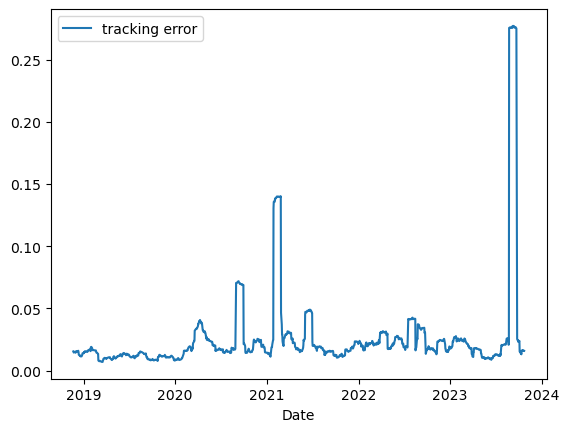

In [17]:
user_tracking_error = CanaryFinancialCalculations.tracking_error(comparing_portfolios, "Portfolio", "SPY")
user_tracking_error.plot()